## Aim 1 Analysis (units of days)

Sensitivity, PPV, NPV, sensitivity analysis of varying numbers of shedding individuals and shedding periods

-blurb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## About the Data

- Shedding period was considered uniform 2 weeks before episode date, and one week after
- A day is considered wastewater positive if there was a wastewater nucleic acid detection on any of the three days tested that week
- Sunday through Saturday is a week

In [2]:
aim_1 = pd.read_csv("combined_day_week.csv")

In [3]:
aim_1[250:300]

,day,testing_day,case,num_shedding,wastewater_signal
250,17-May-24,0,0,1,1
251,18-May-24,0,0,1,1
252,19-May-24,1,0,0,1
253,20-May-24,1,0,0,1
254,21-May-24,0,0,0,1
255,22-May-24,1,0,0,1
256,23-May-24,0,0,0,1
257,24-May-24,0,0,0,1
258,25-May-24,0,0,0,1
259,26-May-24,1,0,0,0


In [4]:
aim_1.dtypes

day                  object
testing_day           int64
case                  int64
num_shedding          int64
wastewater_signal     int64
dtype: object

In [6]:
# Just testing days
aim1 = aim_1[aim_1['testing_day'] == 1]

In [7]:
aim1.head()

,day,testing_day,case,num_shedding,wastewater_signal
0,10-Sep-23,1,0,0,1
1,11-Sep-23,1,0,0,1
3,13-Sep-23,1,0,0,1
7,17-Sep-23,1,0,0,0
8,18-Sep-23,1,0,0,0


First, finding **true positives (TP)**, **true negatives (TN)**, **false positives (FP)** and **false negatives (FN)**
- True positives (TP) will be defined as days when Hepatitis A virus was detected in wastewater that week and there are cases of individuals shedding the virus on that day. 
- False negatives (FN) will be defined as days when the virus is not detected in wastewater that week, but there are still cases of individuals shedding the virus on that day. 
- True negatives (TN) will be defined as days with no virus detections in wastewater that week and no individuals shedding the virus on that day. 
- False positives (FP) will be defined as days when the virus is detected in wastewater that week, but no individuals are shedding virus on that day

In [9]:
tp = aim1[(aim1['wastewater_signal'] == 1) & (aim1['num_shedding'] > 0)]
fn = aim1[(aim1['wastewater_signal'] == 0) & (aim1['num_shedding'] > 0)]
tn = aim1[(aim1['wastewater_signal'] == 0) & (aim1['num_shedding'] == 0)]
fp = aim1[(aim1['wastewater_signal'] == 1) & (aim1['num_shedding'] == 0)]

In [10]:
len(tp)

37

In [11]:
len(fn)

15

In [12]:
len(tn)

41

In [13]:
len(fp)

38

### Sensitivity Overall

Sensitivity will be defined as the probability of a wastewater detection given that one or more persons are shedding the virus (TP / (TP+FN))

In [14]:
sensitivity_cdc = len(tp) / (len(tp) +len(fn))
sensitivity_cdc

0.7115384615384616

### Positive Predictive Value
Positive predictive value (PPV) will be the probability that at least one person is shedding the virus when a wastewater detection occurs (TP / (TP+FP))

In [15]:
ppv_cdc = len(tp) / (len(tp) + len(fp))
ppv_cdc

0.49333333333333335

### Negative Predictive Value
Negative predictive value (NPV) will be the probability that no persons are shedding the virus in the absence of wastewater detections (TN / (TN+FN))

In [16]:
npv_cdc = len(tn) / (len(tn) + len(fn))
npv_cdc

0.7321428571428571

### Sensitivity for Specific Numbers of People Shedding
For this, the definitions of true positive (TP), false negative (FN), true negative (TN), and false positive (FP) will be adjusted based on the specified number of cases shedding. 
- True positives (TP) will be defined as days when Hepatitis A virus is detected in wastewater and at least the specified number of cases are shedding the virus.
- False negatives (FN) will be days when the virus is not detected in wastewater, but at least the specified number of cases are shedding the virus. 
- True negatives (TN) will be days with no virus detections and fewer than the specified number of cases shedding the virus. 
- False positives (FP) will be days when the virus is detected in wastewater, but fewer than the specified number of cases are shedding the virus.

In [17]:
# Finding the maximum number of individuals assumed to be shedding at any given time in our data
max_shedding = aim1['num_shedding'].max()
max_shedding

4

In [18]:
aim1.head()

,day,testing_day,case,num_shedding,wastewater_signal
0,10-Sep-23,1,0,0,1
1,11-Sep-23,1,0,0,1
3,13-Sep-23,1,0,0,1
7,17-Sep-23,1,0,0,0
8,18-Sep-23,1,0,0,0


**Since the max number of individuals shedding at any given time is 4 based on our assumptions and criteria, we will do the sensitivity analysis for 2, 3 and 4 individuals shedding**

In [19]:
# Functions for tp, fn, tn, fp with varying thresholds
def tp(threshold, data):
    df = data[(data['wastewater_signal'] == 1) & (data['num_shedding'] >= threshold)]
    return df.shape[0]

def fn(threshold, data):
    df = data[(data['wastewater_signal'] == 0) & (data['num_shedding'] >= threshold)]
    return df.shape[0]

def tn(threshold, data):
    df = data[(data['wastewater_signal'] == 0) & (data['num_shedding'] < threshold)]
    return df.shape[0]

def fp(threshold, data):
    df = data[(data['wastewater_signal'] == 1) & (data['num_shedding'] < threshold)]
    return df.shape[0]  

In [20]:
# Sensitivity, PPV, NPV functions
def sensitivity(threshold, data):
    return (tp(threshold, data) / (tp(threshold, data) + fn(threshold, data)))

def ppv(threshold, data):
    return tp(threshold, data) / (tp(threshold, data) + fp(threshold, data))

def npv(threshold, data):
    return tn(threshold, data) / (tn(threshold, data) + fn(threshold, data))

In [21]:
# For 2 individuals
sensitivity_2 = sensitivity(2, aim1)
ppv_2 = ppv(2, aim1)
npv_2 = npv(2, aim1)
print(f'sensitivity: {sensitivity_2}, ppv: {ppv_2}, npv: {npv_2}')

sensitivity: 0.8421052631578947, ppv: 0.21333333333333335, npv: 0.9464285714285714


In [22]:
# For 3 individuals
sensitivity_3 = sensitivity(3, aim1)
ppv_3 = ppv(3, aim1)
npv_3 = npv(3, aim1)
print(f'sensitivity: {sensitivity_3}, ppv: {ppv_3}, npv: {npv_3}')

sensitivity: 0.8333333333333334, ppv: 0.2, npv: 0.9464285714285714


In [23]:
# For 4 individuals
sensitivity_4 = sensitivity(4, aim1)
ppv_4 = ppv(4, aim1)
npv_4 = npv(4, aim1)
print(f'sensitivity: {sensitivity_4}, ppv: {ppv_4}, npv: {npv_4}')

sensitivity: 0.9166666666666666, ppv: 0.14666666666666667, npv: 0.9821428571428571


### Varying Shedding Period

In [26]:
s1 = pd.read_csv('s1.csv')
s2 = pd.read_csv('s2.csv')
s3 = pd.read_csv('s3.csv')

In [27]:
# Sensitivity s1: 1 week before 1 week after
s1_testing=s1[s1['testing_day'] == 1]
s1_testing['num_shedding'].max()

4.0

In [29]:
s1_1 = sensitivity(1, s1_testing)
s1_2 = sensitivity(2, s1_testing)
s1_3 = sensitivity(3, s1_testing)
s1_4 = sensitivity(4, s1_testing)
print(f'1: {s1_1}, 2: {s1_2}, 3: {s1_3}, 4: {s1_4}')

1: 0.8292682926829268, 2: 1.0, 3: 1.0, 4: 1.0


In [30]:
# Sensitivity s2: 1 week before, 4 weeks after
s2_testing = s2[s2['testing_day'] == 1]
s2_testing['num_shedding'].max()

5

In [32]:
s2_1 = sensitivity(1, s2_testing)
s2_2 = sensitivity(2, s2_testing)
s2_3 = sensitivity(3, s2_testing)
s2_4 = sensitivity(4, s2_testing)
s2_5 = sensitivity(5, s2_testing)
print(f'1: {s2_1}, 2: {s2_2}, 3: {s2_3}, 4: {s2_4}, 5: {s2_5}')

1: 0.6973684210526315, 2: 0.8064516129032258, 3: 0.8, 4: 0.875, 5: 1.0


In [33]:
# Sensitivity s3: 2 weeks before, 4 weeks after
s3_testing = s3[s3['testing_day'] == 1]
s3_testing['num_shedding'].max()

5

In [35]:
s3_1 = sensitivity(1, s3_testing)
s3_2 = sensitivity(2, s3_testing)
s3_3 = sensitivity(3, s3_testing)
s3_4 = sensitivity(4, s3_testing)
s3_5 = sensitivity(5, s3_testing)
print(f'1: {s3_1}, 2: {s3_2}, 3: {s3_3}, 4: {s3_4}, 5: {s3_5}')

1: 0.6511627906976745, 2: 0.7368421052631579, 3: 0.75, 4: 0.8666666666666667, 5: 1.0


### PPV and NPV for Various Shedding Periods

In [36]:

# PPV
ppv_shedding_1 = ppv(1, s1)
ppv_shedding_2 = ppv(1, s2)
ppv_shedding_3 = ppv(1, s3)
print(f'Shedding period 1 (1 week before and 1 week after): {ppv_shedding_1}\nCDC Shedding period (2 weeks before 1 week after): {ppv_cdc}\nShedding period 2 (1 week before and 4 weeks after): {ppv_shedding_2}\nShedding period 3 (2 weeks before 4 weeks after): {ppv_shedding_3}')



Shedding period 1 (1 week before and 1 week after): 0.44571428571428573
CDC Shedding period (2 weeks before 1 week after): 0.49333333333333335
Shedding period 2 (1 week before and 4 weeks after): 0.7142857142857143
Shedding period 3 (2 weeks before 4 weeks after): 0.7371428571428571


In [37]:
# NPV
npv_shedding_1 = npv(1, s1)
npv_shedding_2 = npv(1, s2)
npv_shedding_3 = npv(1, s3)
print(f'Shedding period 1 (1 week before and 1 week after): {npv_shedding_1}\nCDC Shedding period (2 weeks before 1 week after): {npv_cdc}\nShedding period 2 (1 week before and 4 weeks after): {npv_shedding_2}\nShedding period 3 (2 weeks before 4 weeks after): {npv_shedding_3}')


Shedding period 1 (1 week before and 1 week after): 0.849624060150376
CDC Shedding period (2 weeks before 1 week after): 0.7321428571428571
Shedding period 2 (1 week before and 4 weeks after): 0.5714285714285714
Shedding period 3 (2 weeks before 4 weeks after): 0.43609022556390975


In [38]:
sensitivity_data = pd.read_csv('sensitivities.csv')
sensitivity_data.head()

,num_shedding,shedding_period,sensitivity
0,≥1,"SP1: 1 week before, 1 week after symptom onset",0.829268
1,≥2,"SP1: 1 week before, 1 week after symptom onset",1.000000
2,≥3,"SP1: 1 week before, 1 week after symptom onset",1.000000
3,≥4,"SP1: 1 week before, 1 week after symptom onset",1.000000
4,≥1,"SP2: 1 week before, 4 weeks after symptom onset",0.697368


### Plotting

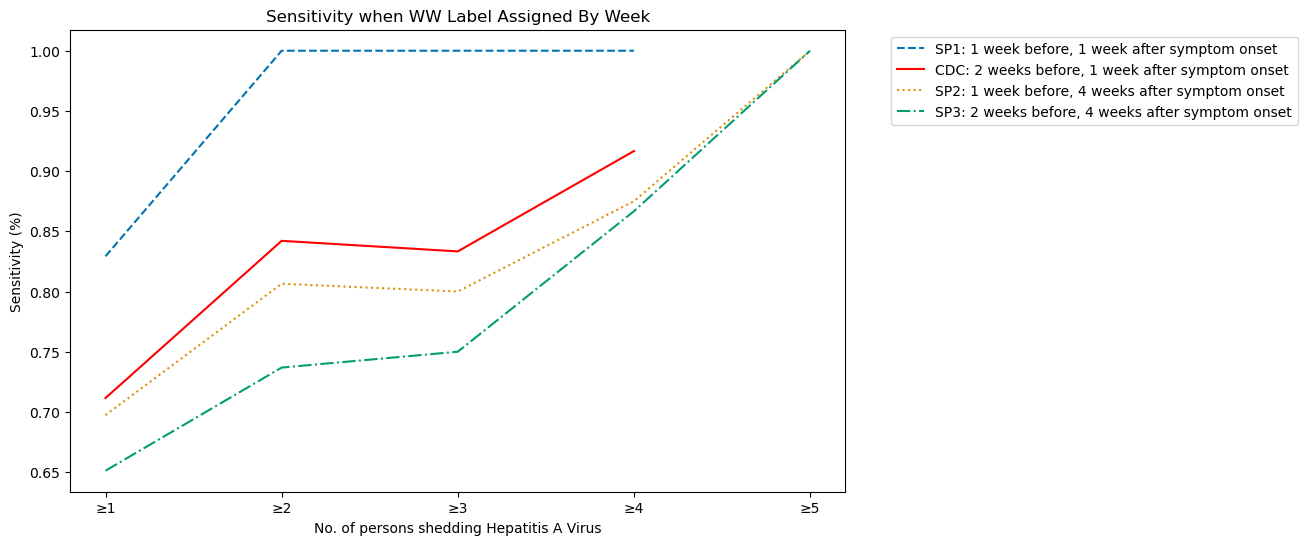

In [39]:
# Define a darker color palette for the shedding periods with different shades of blue and red for CDC
darker_palette = sns.color_palette("colorblind", 3)  # Darker shades of blue for SP1, SP2, SP3
colors = {
    'SP1: 1 week before, 1 week after symptom onset': darker_palette[0],
    'SP2: 1 week before, 4 weeks after symptom onset': darker_palette[1],
    'SP3: 2 weeks before, 4 weeks after symptom onset': darker_palette[2],
    'CDC: 2 weeks before, 1 week after symptom onset': 'red'
}
linestyles = {
    'SP1: 1 week before, 1 week after symptom onset': 'dashed',
    'SP2: 1 week before, 4 weeks after symptom onset': 'dotted',
    'SP3: 2 weeks before, 4 weeks after symptom onset': 'dashdot',
    'CDC: 2 weeks before, 1 week after symptom onset': 'solid'
}

# Plot all lines with the specified colors and linestyles
plt.figure(figsize=(10, 6))
for period in sensitivity_data['shedding_period'].unique():
    period_data = sensitivity_data[sensitivity_data['shedding_period'] == period]
    sns.lineplot(data=period_data, x='num_shedding', y='sensitivity', 
                 color=colors[period], linestyle=linestyles[period], label=period)

# Customize the x-axis labels
plt.xticks(ticks=sensitivity_data['num_shedding'].unique(), 
           labels=sensitivity_data['num_shedding'].unique())

# Customize the plot
plt.title('Sensitivity when WW Label Assigned By Week')
plt.xlabel('No. of persons shedding Hepatitis A Virus')
plt.ylabel('Sensitivity (%)')

# Update the legend order to have CDC second
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 2, 1, 3]  # Reordering to place CDC second
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()